<a href="https://colab.research.google.com/github/seonguk9303/AI_lesson/blob/main/221104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# news_small.zip 파일 업로드
# 압축 풀어 103폴더를 working dic 지정
# 103폴더 파일 하나씩 읽어 Kkma 사용 각 명사만 추출하여 리스트로
# 전체 결과를 하나의 리스트로

In [ ]:
!unzip news_small.zip

In [13]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 6.9 MB/s 
     |████████████████████████████████| 465 kB 58.5 MB/s 


In [14]:
import os
import pandas as pd
from konlpy.tag import Kkma  
#os.chdir('./103')
files = os.listdir()
path = files[0]

In [23]:
kkma=Kkma()  
result = []
def expo(path) :
  nouns = []
  with open(path, "r", encoding='utf-8') as f:
    s = f.read()
    nouns = kkma.nouns(s)
  
  return nouns

In [24]:
for file in files:
  result.append(expo(file))

In [ ]:
# kkma 형태소 분석기 사용
# df 데이터프레임을 DTM로 만들기
# 행렬의 값은 TF(Term Frequency)가 되도록 CountVectorizer 사용

In [30]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from konlpy.tag import Kkma  
from sklearn.feature_extraction.text import CountVectorizer
#os.chdir('./..')
files1 = os.listdir('./103')   #압축이 풀린 103폴더의 파일들을 읽음
files2 = os.listdir('./105')   #압축이 풀린 105폴더의 파일들을 읽음
y = []
x = []

#txt파일을 읽어서 파일 내용을 x라는 리스트에 추가
def add_file(path):
    with open(path, "r", encoding="utf-8") as f:
        s = f.read()
        x.append(s)

for f in files1:  #파일갯수만큼 반복
     add_file("103/"+f) #103폴더 신문기사가 X에 추가
     y.append(0)#103폴더 신문기사만큼 y에 0값을 추가, 0은 103을 나타내는 범주

for f in files2:
     add_file("105/"+f)
     y.append(1)  #105를 나타내는 범주 1

df = pd.DataFrame( {'label':y, 'articles':x })
train_df, test_df = train_test_split( df, test_size=0.2)

morphs = Kkma()
def token(text):
    tokens_ko = morphs.nouns(text)
    return tokens_ko

token(df['articles'][0])  

tfidf_vect = CountVectorizer(tokenizer=token, min_df=10)
tfidf_vect.fit(train_df['articles'])  #train의 명사를 뽑은 것까지

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


CountVectorizer(min_df=10, tokenizer=<function token at 0x7f45aa2c65f0>)

In [31]:
tfidf_matrix_train = tfidf_vect.transform(train_df['articles'])
tfidf_matrix_train

<320x1694 sparse matrix of type '<class 'numpy.int64'>'
	with 48775 stored elements in Compressed Sparse Row format>

In [ ]:
# 위의 예제를 news.zip으로 해서 다시 작업
# Okt, 파티셔닝 8:2
# RF로 accuracy 출력

In [ ]:
!unzip news.zip

In [36]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from konlpy.tag import Okt  
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#os.chdir('./..')
files1 = os.listdir('./103')   #압축이 풀린 103폴더의 파일들을 읽음
files2 = os.listdir('./105')   #압축이 풀린 105폴더의 파일들을 읽음
y = []
x = []

#txt파일을 읽어서 파일 내용을 x라는 리스트에 추가
def add_file(path):
    with open(path, "r", encoding="utf-8") as f:
        s = f.read()
        x.append(s)

for f in files1:  #파일갯수만큼 반복
     add_file("103/"+f) #103폴더 신문기사가 X에 추가
     y.append(0)#103폴더 신문기사만큼 y에 0값을 추가, 0은 103을 나타내는 범주

for f in files2:
     add_file("105/"+f)
     y.append(1)  #105를 나타내는 범주 1

df = pd.DataFrame( {'label':y, 'articles':x })
train_df, test_df = train_test_split( df, test_size=0.2)

morphs = Okt()
def token(text):
    tokens_ko = morphs.nouns(text)
    return tokens_ko

token(df['articles'][0])  

tfidf_vect = TfidfVectorizer(tokenizer=token, min_df=10)
tfidf_vect.fit(train_df['articles'])  #train의 명사를 뽑은 것까지

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


TfidfVectorizer(min_df=10, tokenizer=<function token at 0x7f45a9720cb0>)

In [38]:
tfidf_matrix_train = tfidf_vect.transform(train_df['articles'])
tfidf_matrix_test = tfidf_vect.transform(test_df['articles'])
rf = RandomForestClassifier(random_state=0, n_estimators=1000)  
rf.fit(tfidf_matrix_train , train_df['label']  )  #모델링
preds1 = rf.predict(tfidf_matrix_test) #테스트셋으로 감성예측
print('Accuracy: ',accuracy_score(test_df['label'],preds1))#정답율

Accuracy:  0.903125


In [ ]:
# 수집대상 뉴스 검색 및 제목 저장
# 원하시는 검색어로 20일 이상의 뉴스 검색 및 수집
# 수집된 텍스트 DTM
# Okt로 명사만 추출

In [42]:
from bs4 import BeautifulSoup
from lxml import etree
from urllib import parse
import requests
import urllib.request
import urllib.parse
import numpy as np
import pandas as pd
import time

#----------------------------------------------#
#변경할 부분
startdate = "2022.10.01"
enddate = "2022.11.03"
searchword ="월드컵"#검색어
#----------------------------------------------#

base_url = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query"+parse.urlencode([('',searchword)], doseq=True)+"&sort=1&photo=3&field=0&pd=3&ds="+startdate+"&de="+enddate+"&mynews=1&office_type=0&office_section_code=0&news_office_checked=&nso=so:dd,p:from"+startdate.replace(".", "")+"to"+enddate.replace(".", "")+",a:all&mynews=0&start="
titles = [ ]
urls = [ ]
i=1

while True:
 try:
    time.sleep(0.45)
    url = base_url+str(i)
    html = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(html, 'html.parser')
    t_news = soup.select('a.news_tit')  #클래스 표시
    t_len = len(t_news)

    if t_len <1:
        break

    for j in np.arange(t_len)+1:
            try: 
                titles.append(soup.select('a.news_tit')[j].text)
                urls.append(soup.select('a.info')[j]['href'])
            except Exception as e:
                continue
    i=i+10
    
 except Exception as e:
    continue

result = pd.DataFrame({"Url": urls, "Title":titles})
result.Url[0]

'https://sports.news.naver.com/news.nhn?oid=023&aid=0003726213'

In [44]:
Okt = Okt()
def token(text):
    tokens_ko = Okt.nouns(text)
    return tokens_ko

#token(df['Title'][0])  

tfidf_vect = TfidfVectorizer(tokenizer=token, min_df=10)
tfidf_vect.fit(result['Title'])  #train의 명사를 뽑은 것까지

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


TfidfVectorizer(min_df=10, tokenizer=<function token at 0x7f45a7adb3b0>)

In [46]:
tfidf_matrix_train = tfidf_vect.transform(result['Title']) 

In [47]:
tfidf_matrix_train

<518x38 sparse matrix of type '<class 'numpy.float64'>'
	with 672 stored elements in Compressed Sparse Row format>

In [ ]:
# 예제파일 수정하여
# ratings_test.txt 리드, 1500행 선택
# train, test 8:2
# okt로 형태소분석, 모든 형태소를 사용해보기
# dtm 생성
# 분류 모형을 적용(target: label)하고 테스트셋 적용 정분류율 구하기

In [1]:
!wget https://github.com/rickiepark/python-machine-learning-book-3rd-edition/raw/master/ch08/ratings_train.txt -O ratings_train.txt
!wget https://github.com/rickiepark/python-machine-learning-book-3rd-edition/raw/master/ch08/ratings_train.txt -O ratings_test.txt

--2022-11-04 07:58:36--  https://github.com/rickiepark/python-machine-learning-book-3rd-edition/raw/master/ch08/ratings_train.txt
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch08/ratings_train.txt [following]
--2022-11-04 07:58:36--  https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch08/ratings_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14628807 (14M) [text/plain]
Saving to: ‘ratings_train.txt’

ratings_train.txt   100%[===================>]  13.95M  --.-KB/s    in 0.07s   



In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from konlpy.tag import Okt  
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

ratings_test = pd.read_csv('ratings_test.txt', sep='\t')#탭으로 값이 구분된 파일
ratings_test = ratings_test.iloc[0:1500, :] 
train_df, test_df = train_test_split( ratings_test, test_size=0.2)
Okt = Okt()

def movie_token_n(text):
    tokens_ko = Okt.nouns(text)
    return tokens_ko

tfidf_vect = TfidfVectorizer(tokenizer=movie_token_n, min_df=10)
tfidf_vect.fit(train_df['document']) 
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [55]:
#RF 이용하여 감성 분석 Classification 수행. 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#n_estimators: RF에 들어가는 tree의 개수
rf = RandomForestClassifier(random_state=0, n_estimators=1000)  
rf.fit(tfidf_matrix_train , train_df['label'])  #모델링
preds1 = rf.predict(tfidf_matrix_test) #테스트셋으로 감성예측
print('Accuracy: ',accuracy_score(test_df['label'],preds1))#정답율

Accuracy:  0.61


In [59]:
def movie_token_m(text):
    tokens_ko = Okt.morphs(text)
    return tokens_ko

tfidf_vect2 = TfidfVectorizer(tokenizer=movie_token_m, min_df=10)
tfidf_vect2.fit(train_df['document']) 
tfidf_matrix_train2 = tfidf_vect2.transform(train_df['document'])
tfidf_matrix_test2 = tfidf_vect2.transform(test_df['document'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [61]:
rf2 = RandomForestClassifier(random_state=0, n_estimators=1000)  
rf2.fit(tfidf_matrix_train2 , train_df['label'])  #모델링
preds2 = rf2.predict(tfidf_matrix_test2) #테스트셋으로 감성예측
print('Accuracy: ',accuracy_score(test_df['label'],preds2))#정답율

Accuracy:  0.62


In [ ]:
# 현재 군집 갯수는 4개, 최적 군집 개수 찾기
# k 범위는 3~15 안에서 최적 군집갯수 찾기
# intertia_ 참고

In [65]:
from sklearn.cluster import KMeans
inertia_arr=[]
for k in range(3,15):
    km_cluster = KMeans(n_clusters=k, random_state=0)
    km_cluster.fit(tfidf_matrix_train)  #DTM을 입력으로 넣음
    cluster_label = km_cluster.labels_
    inertia = km_cluster.inertia_
    print(' k :',k, 'inertia :', inertia)
    
    inertia_arr.append(inertia)

 k : 3 inertia : 815.9939736626538
 k : 4 inertia : 803.27011091634
 k : 5 inertia : 786.8194698637
 k : 6 inertia : 773.4819984882561
 k : 7 inertia : 762.2382623199621
 k : 8 inertia : 742.139020797262
 k : 9 inertia : 727.2060842611794
 k : 10 inertia : 719.6894333843138
 k : 11 inertia : 704.8732740224532
 k : 12 inertia : 691.5150178430999
 k : 13 inertia : 682.3952015345158
 k : 14 inertia : 670.3237629635303


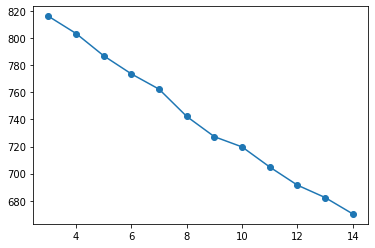

In [68]:
import matplotlib.pyplot as plt
plt.plot(range(3,15), inertia_arr, marker = 'o')

In [ ]:
# 영화 리뷰 ratings_train.txt 파일에서 1000개만 사용하여 gensim을 이용 토픽 발견
# 한글 아닌것 제거
# okt 이용 명사만 추출
# 토픽은 10,12,14,16,18개 중에서 최적의 갯수 찾기

In [ ]:
!wget https://github.com/rickiepark/python-machine-learning-book-3rd-edition/raw/master/ch08/ratings_train.txt -O ratings_train.txt

In [8]:
import pandas as pd
from konlpy.tag import Okt  
from tqdm import tqdm

ratings_train = pd.read_csv('ratings_train.txt', sep='\t')#탭으로 값이 구분된 파일
ratings_train = ratings_train.iloc[0:1000, :] 

ratings_train['document'] = ratings_train['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

#값을 저장할 비어있는 리스트를 만듬.
tokenized_data = []   

# 불용어 정의
stopwords = ['을', 'ㅋㅋ', 
             '부터', '까지' '적', '의','가','이','은',
             '들','는','좀','잘','걍','과','도','를','으로',
             '자','에','와','한','하다', '점', '나']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

for sentence in tqdm(ratings_train['document']): #리뷰 각각에 대해서 아래작업 반복
    tokenized_sentence = okt.nouns(sentence)  #각 리뷰에서 명사만 뽑아서 리스트
    #위에서 명사만 추출한 결과에서, 각 명사가 stopwords인지 체크하고
    #stopwords 아닌 명사만 사용함
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
100%|██████████| 1000/1000 [00:28<00:00, 35.40it/s]


In [9]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_data) #사전 구성
corpus = [dictionary.doc2bow(text) for text in tokenized_data]  

from gensim.models.ldamodel import LdaModel 
from gensim.models.coherencemodel import CoherenceModel 

coherence_values = [] 
model_list = [] 
iters = [10,12,14,16,18]

for num_topics in iters: 
     model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics) 
     model_list.append(model) 
     coherencemodel = CoherenceModel(model=model, texts=tokenized_data, dictionary=dictionary, coherence='c_v') 
     coherence_values.append(coherencemodel.get_coherence()) 

for i in range(0, len(iters)):
  print(model_list[i], coherence_values[i])  #topic num별로 coherence 가 높은 것을 찾기

LdaModel(num_terms=2369, num_topics=10, decay=0.5, chunksize=2000) 0.4190996259410107
LdaModel(num_terms=2369, num_topics=12, decay=0.5, chunksize=2000) 0.43937567355234824
LdaModel(num_terms=2369, num_topics=14, decay=0.5, chunksize=2000) 0.4543088780460846
LdaModel(num_terms=2369, num_topics=16, decay=0.5, chunksize=2000) 0.4684286351719893
LdaModel(num_terms=2369, num_topics=18, decay=0.5, chunksize=2000) 0.49631502788237747
